EDA of the data set

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

import joblib
from time import time


In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [97]:
df.shape

(440, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.groupby(['Channel', 'Region']).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

In [26]:
df.groupby(['Channel', 'Region']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

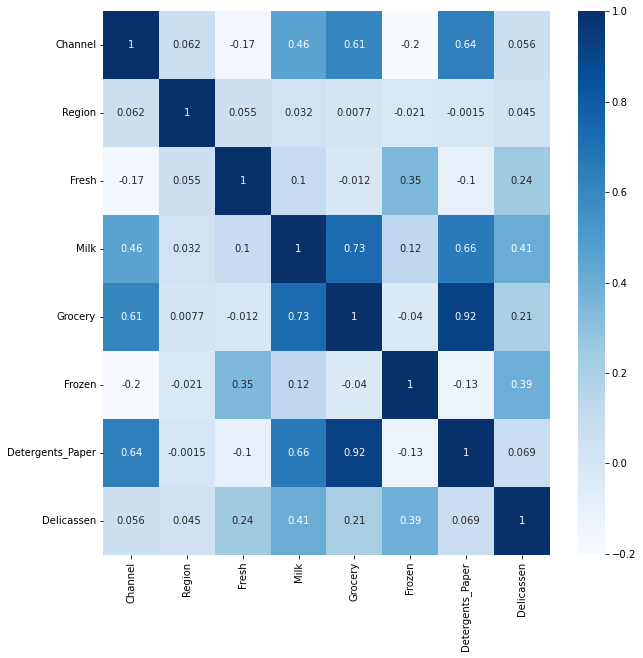

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

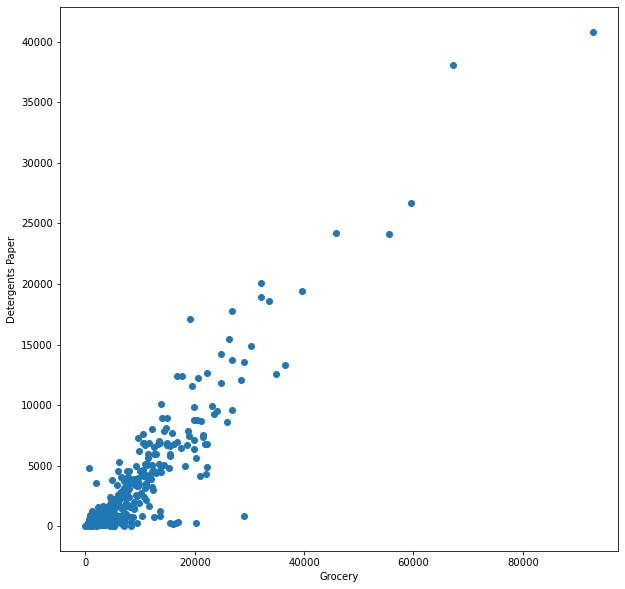

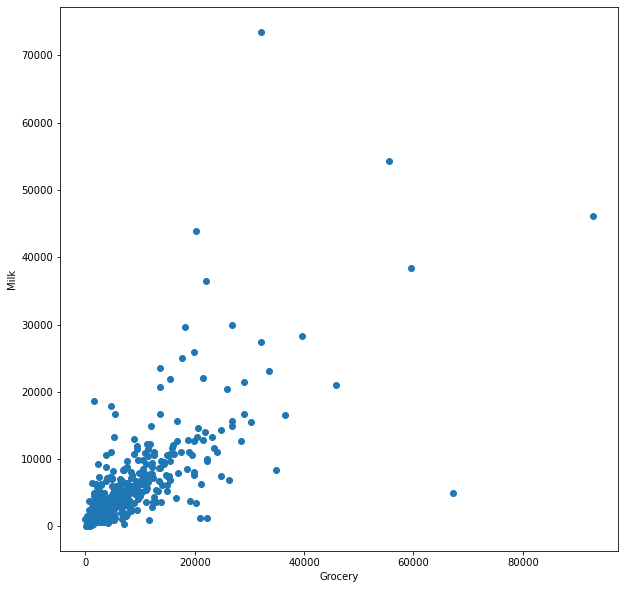

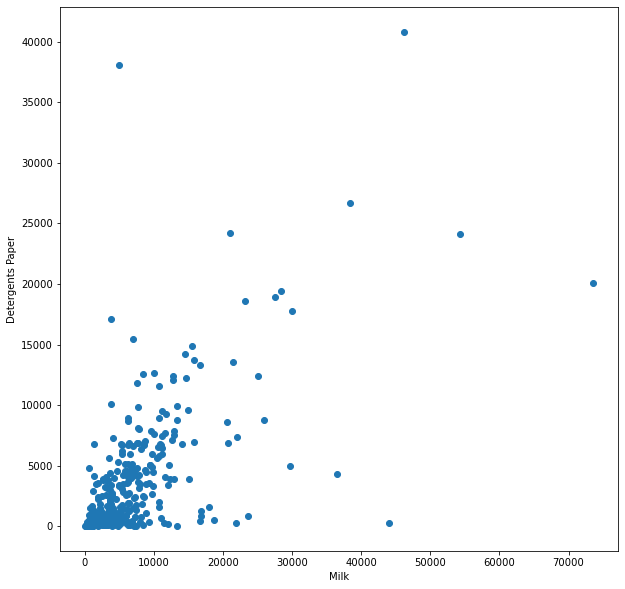

In [10]:
for i in [['Grocery', 'Detergents_Paper'], ['Grocery', 'Milk'], ['Milk', 'Detergents_Paper']]:
    plt.figure(figsize=(10, 10))
    plt.scatter(x=i[0], y=i[1], data=df)
    plt.xlabel(i[0])
    plt.ylabel(i[1].replace("_", " "))
    plt.show()

<Figure size 432x288 with 0 Axes>

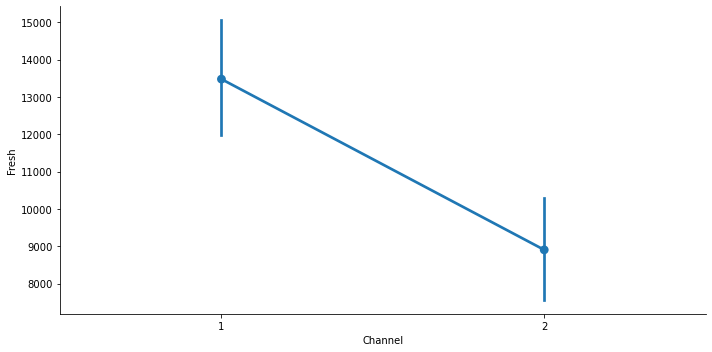

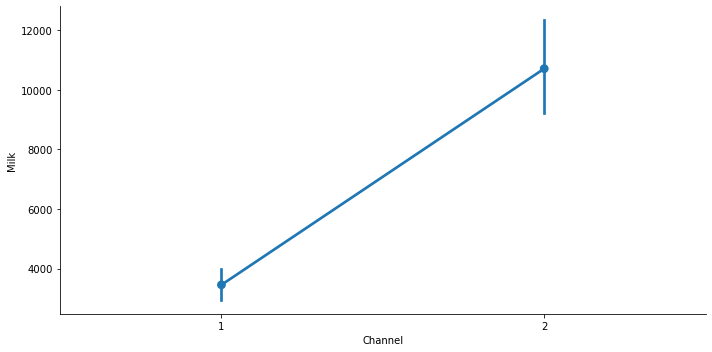

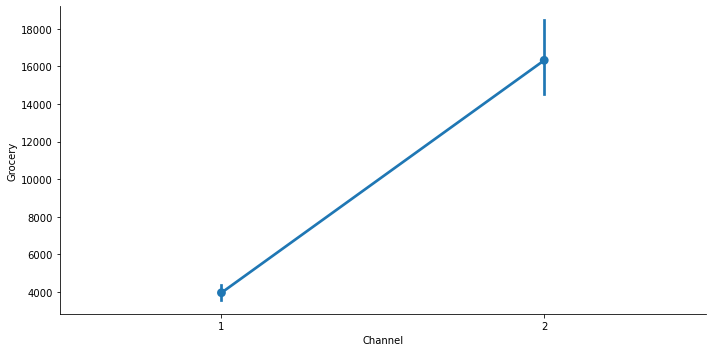

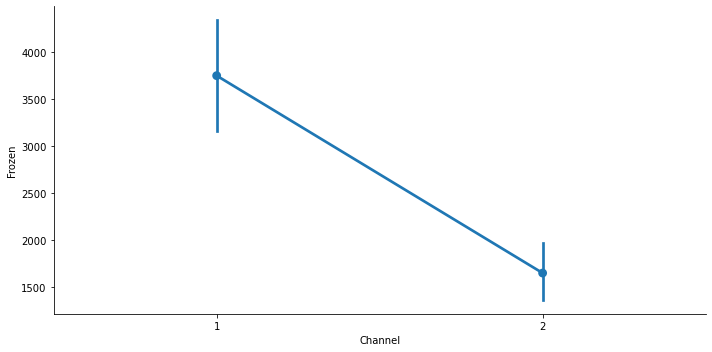

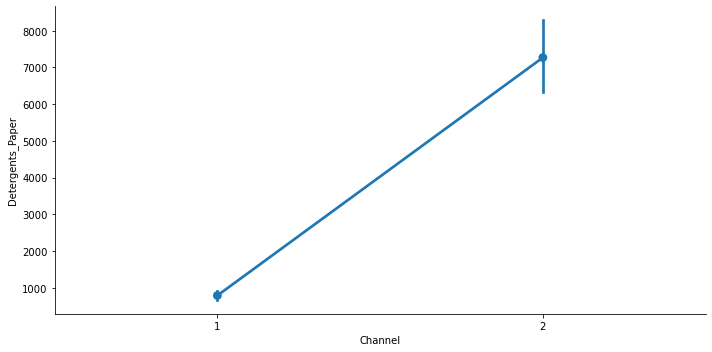

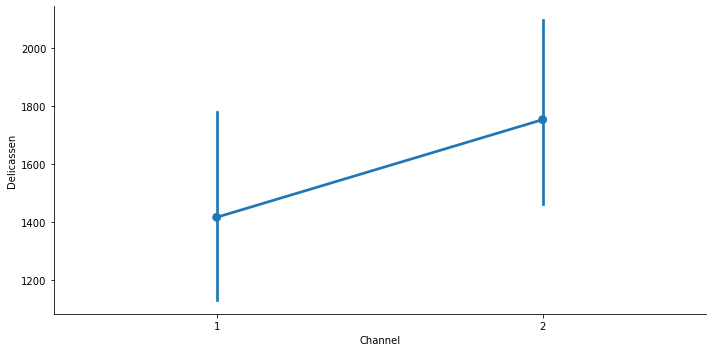

In [11]:
for i, col in enumerate(['Fresh', 'Milk', 'Grocery' ,'Frozen', 'Detergents_Paper', 'Delicassen']):
    plt.figure(i)
    sns.catplot(x='Channel', y=col, data=df, kind='point', aspect=2)

/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


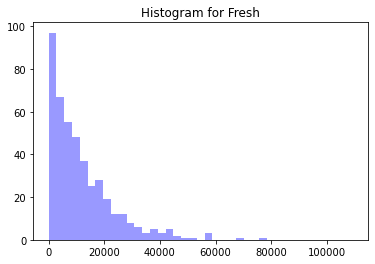

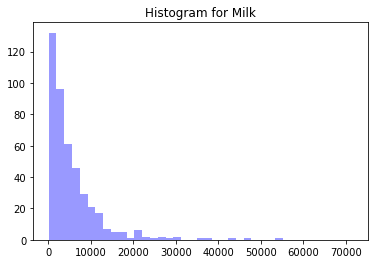

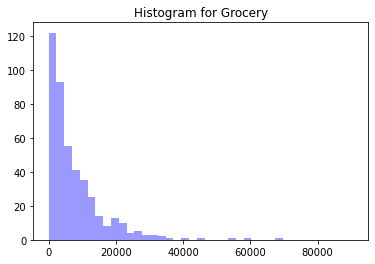

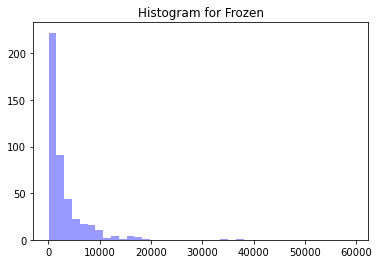

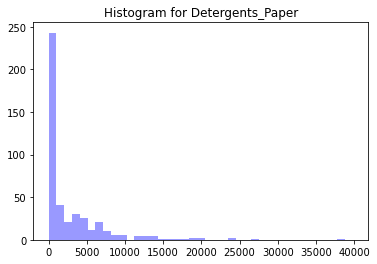

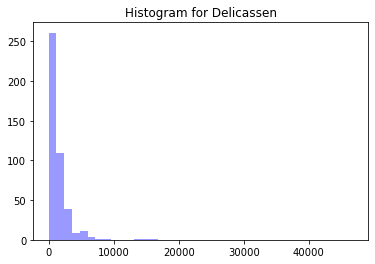

In [27]:
for i in ['Fresh', 'Milk', 'Grocery' ,'Frozen', 'Detergents_Paper', 'Delicassen']:
    data = list(df[i])
    xmin = min(data)
    xmax = max(data)
    width = (xmax - xmin) / 40
    
    sns.distplot(data, color='b', kde=False, bins=np.arange(xmin, xmax, width))
    plt.title(f'Histogram for {i}')
    plt.show()

In [98]:
X = df.drop('Channel', axis=1)
y = df['Channel']

In [99]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [100]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [101]:
y[y == 2] = 0
y[y == 1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Feature Scaling

In [65]:
only_continuous_df = df.loc[:, (df.columns != 'Channel') & (df.columns != 'Region')]
only_continuous_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


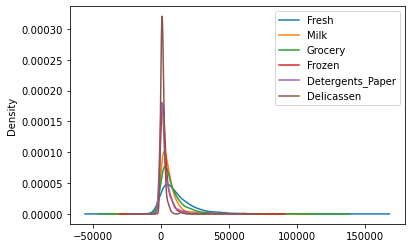

In [66]:
pd.DataFrame(only_continuous_df).plot(kind='kde');

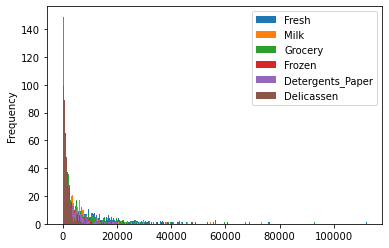

In [67]:
pd.DataFrame(only_continuous_df).plot(kind='hist', bins=300);

                  0             1             2             3             4  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean  -2.422305e-17 -1.589638e-17 -6.030530e-17  1.135455e-17 -1.917658e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -9.496831e-01 -7.787951e-01 -8.373344e-01 -6.283430e-01 -6.044165e-01   
25%   -7.023339e-01 -5.783063e-01 -6.108364e-01 -4.804306e-01 -5.511349e-01   
50%   -2.767602e-01 -2.942580e-01 -3.366684e-01 -3.188045e-01 -4.336004e-01   
75%    3.905226e-01  1.890921e-01  2.849105e-01  9.946441e-02  2.184822e-01   
max    7.927738e+00  9.183650e+00  8.936528e+00  1.191900e+01  7.967672e+00   

                  5  
count  4.400000e+02  
mean  -8.276208e-17  
std    1.001138e+00  
min   -5.402644e-01  
25%   -3.964005e-01  
50%   -1.985766e-01  
75%    1.048598e-01  
max    1.647845e+01  


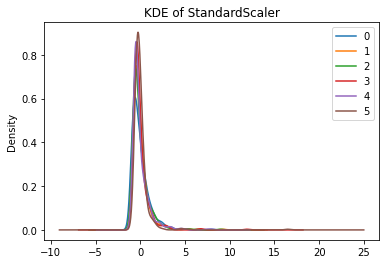

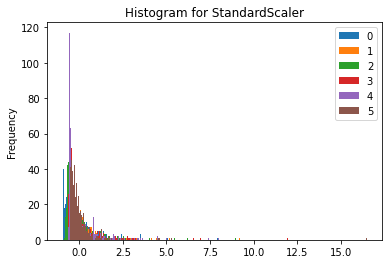

In [68]:
scaled_std = StandardScaler().fit_transform(only_continuous_df)
print(pd.DataFrame(scaled_std).describe())
pd.DataFrame(scaled_std).plot(kind='kde', title='KDE of StandardScaler');
pd.DataFrame(scaled_std).plot(kind='hist', bins=300, title='Histogram for StandardScaler');

                0           1           2           3           4           5
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000
mean     0.106977    0.078173    0.085671    0.050078    0.070510    0.031745
std      0.112774    0.100491    0.102430    0.079789    0.116790    0.058826
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.027863    0.020124    0.023174    0.011788    0.006216    0.008453
50%      0.075802    0.048636    0.051225    0.024670    0.019927    0.020077
75%      0.150968    0.097154    0.114821    0.058005    0.095997    0.037907
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000


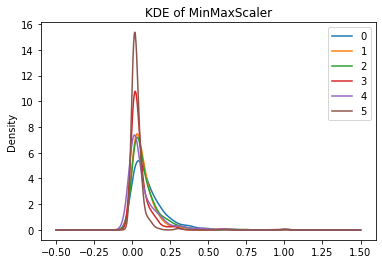

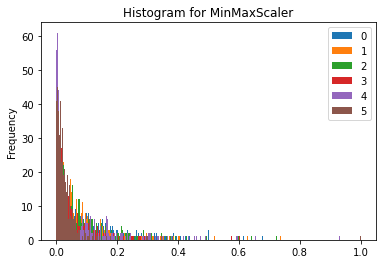

In [69]:
scaled_minmax = MinMaxScaler().fit_transform(only_continuous_df)
print(pd.DataFrame(scaled_minmax).describe())
pd.DataFrame(scaled_minmax).plot(kind='kde', title='KDE of MinMaxScaler');
pd.DataFrame(scaled_minmax).plot(kind='hist', bins=300, title='Histogram for MinMaxScaler');

I chose the MinMaxScaler to proceed ahead, becuase it preserves the shape of the original dataset. Also, since I have no reasons to assume the dataset is normally distributed, I don't see why using the StandardScaler is a good idea. 

RFECV

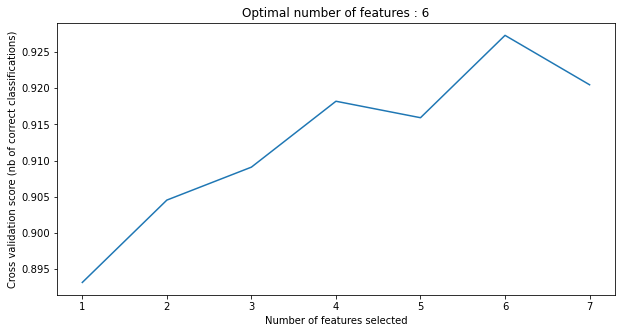

In [102]:
rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

Identify the optimal number of clusters

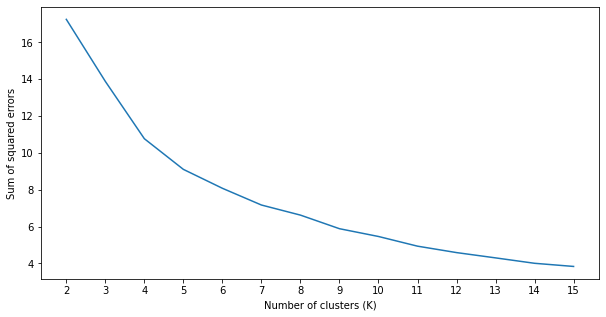

In [123]:
from sklearn.cluster import KMeans

elbow_df = pd.DataFrame(columns=['k', 'sse'])

for k in range(2, 16):
    clustering = KMeans(n_clusters=k, random_state=5)
    clustering.fit(scaled_minmax)
    elbow_df.loc[elbow_df.shape[0]] = [k, clustering.inertia_]

plt.figure(figsize=(10,5))
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of squared errors")
plt.xticks(np.arange(min(elbow_df.k), max(elbow_df.k)+1, 1.0))
plt.plot(elbow_df.k, elbow_df.sse)
plt.show()

In [71]:
elbow_df

,k,sse
0,2.0,17.246033
1,3.0,13.878392
2,4.0,10.766660
3,5.0,9.102118
4,6.0,8.075228
5,7.0,7.167324
6,8.0,6.619243
7,9.0,5.881264
8,10.0,5.458951
9,11.0,4.933668


Based on the elbow plot, k=14 is the optimal number of clusters.

PCA

In [95]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
df_pca = pca.fit_transform(pd.DataFrame(scaled_minmax))

pca.explained_variance_ratio_[0:2]

array([0.51948323, 0.26407007])

In [93]:
pca.explained_variance_ratio_[0:4]

array([0.51948323, 0.26407007, 0.106061  , 0.06258016])

In [79]:
pca.explained_variance_ratio_.sum()

1.0

In [87]:
comps = pd.DataFrame(pca.components_, columns=['Fresh', 'Milk', 'Grocery' ,'Frozen', 'Detergents_Paper', 'Delicassen'])
comps

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.018545,0.490473,0.576447,-0.017416,0.647882,0.082140
1,0.863877,0.181824,-0.003639,0.396910,-0.126527,0.217017
2,-0.501784,0.333715,-0.086809,0.658337,-0.220706,0.383657
3,-0.024034,-0.627960,0.197409,0.605219,0.350505,-0.277443
4,-0.006627,-0.467946,0.208942,-0.205803,0.057185,0.831686
5,-0.031049,-0.041268,0.759956,-0.010319,-0.624023,-0.174035


<AxesSubplot:>

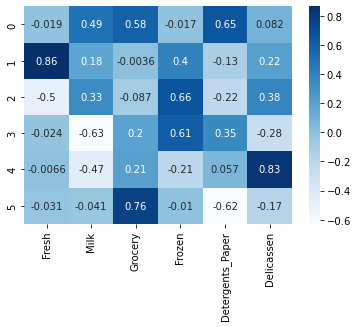

In [96]:
sns.heatmap(comps, cmap="Blues", annot=True)

XGBoost Classifier with 5 Fold CV

In [104]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [106]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

[17:25:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Geoffrey/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
start = time()
y_pred = xgb_clf.predict(X_test)
end = time()
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average="micro"), 3)
recall = round(recall_score(y_test, y_pred, average="micro"), 3)
print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format('XGBoost',
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

XGBoost -- Accuracy: 0.894 / Precision: 0.894 / Recall: 0.894 / Latency: 5.6ms


In [115]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5, metrics="auc", as_pandas=True)

In [116]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.943901,0.005610,0.939740,0.022021
1,0.955742,0.003892,0.950261,0.021310
2,0.960787,0.002915,0.950974,0.021140
3,0.961713,0.003903,0.954676,0.020474
4,0.962270,0.005038,0.955002,0.021050
